<p align="center"><img src="https://i.imgur.com/pSDefTx.jpg"></p>

In [1]:
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

# request package to GET from API endpoint
r = requests.get(url)

# transform request into json object
json = r.json()

json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [2]:
teams_df = pd.DataFrame(json['teams'])
elements_df = pd.DataFrame(json['elements'])
element_types_df = pd.DataFrame(json['element_types'])

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
elements_df

chance_of_playing_next_round  chance_of_playing_this_round    code  \
0                             NaN                           NaN   80201   
1                             0.0                           0.0  115918   
2                             0.0                           0.0   47431   
3                           100.0                         100.0   54694   
4                             NaN                           NaN   58822   
5                           100.0                         100.0   59966   
6                             0.0                           0.0   84450   
7                           100.0                         100.0   92371   
8                             0.0                           0.0   98745   
9                             NaN                           NaN  101184   
10                          100.0                         100.0  111457   
11                          100.0                         100.0  153256   
12                            NaN                           NaN  154043   
13                          100.0                         100.0  156074   
14                           75.0                         100.0  167199   
15                          100.0                          75.0  192895   
16                          100.0                         100.0  195735   
17                            0.0                           0.0  198849   
18                          100.0                         100.0  205533   
19                          100.0                         100.0  209289   
20                          100.0                         100.0  223340   
21                          100.0                         100.0  226597   
22                            0.0                           0.0  233963   
23                            0.0                           0.0  242166   
24                          100.0                         100.0  444145   
25                            0.0                           0.0  462424   
26                          100.0                         100.0  198869   
27                            NaN                           NaN  437626   
28                            NaN                           NaN  437742   
29                            NaN                           NaN  232223   
30                            0.0                           0.0  200641   
31                            NaN                           NaN  463748   
32                          100.0                         100.0  184029   
33                            NaN                           NaN  225321   
34                            NaN                           NaN  220682   
35                            NaN                           NaN  223723   
36                            NaN                           NaN   79852   
37                            0.0                           0.0   85242   
38                          100.0                         100.0   98980   
39                            0.0                           0.0  108156   
40                            0.0                           0.0  110504   
41                          100.0                         100.0  122775   
42                          100.0                         100.0  122806   
43                            NaN                           NaN  123354   
44                            0.0                           0.0  148508   
45                          100.0                         100.0  149484   
46                            NaN                           NaN  169359   
47                          100.0                         100.0  178301   
48                            NaN                           NaN  184704   
49                            NaN                           NaN  193488   
50                          100.0                         100.0  195546   
51                          100.0                         100.0  199796   
52                          10

In [4]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [5]:
dreamteam_df = elements_df[['dreamteam_count', 'in_dreamteam', 'element_type', 'now_cost', 'points_per_game', 'selected_by_percent', 'total_points', 'value_season', 'web_name']]
dreamteam_df = dreamteam_df[dreamteam_df['in_dreamteam']==True].sort_values(by=['element_type','points_per_game'], ascending=[True,True])
dreamteam_df

dreamteam_count  in_dreamteam  element_type  now_cost points_per_game  \
187                0          True             1        62             5.3   
361                3          True             2        64             6.1   
338                3          True             2        77             7.1   
186                3          True             2        59             7.9   
334                5          True             3       130            10.6   
19                 1          True             3        58             5.2   
331                0          True             3       119             5.4   
500                2          True             3       103             5.8   
194                3          True             3        58             6.2   
266                2          True             4       108             5.5   
572                3          True             4        82             6.1   

    selected_by_percent  total_points value_season          web_name  
187                19.6            53          8.5             Mendy  
361                27.8            67         10.5           Cancelo  
338                29.4            64          8.3  Alexander-Arnold  
186                20.8            63         10.7             James  
334                71.5           117          9.0             Salah  
19                 20.4            57          9.8        Smith Rowe  
331                 3.9            59          5.0              Mané  
500                19.4            58          5.6               Son  
194                14.1            62         10.7         Gallagher  
266                30.1            60          5.6             Vardy  
572                47.6            61          7.4           Antonio

In [6]:
dreamteam_df.now_cost.sum()

920

In [7]:
dreamteam_df.dtypes

dreamteam_count         int64
in_dreamteam             bool
element_type            int64
now_cost                int64
points_per_game        object
selected_by_percent    object
total_points            int64
value_season           object
web_name               object
dtype: object

In [8]:
dreamteam_df[['points_per_game', 'selected_by_percent', 'value_season']] = dreamteam_df[['points_per_game', 'selected_by_percent', 'value_season']].apply(pd.to_numeric)
dreamteam_df.dtypes

dreamteam_count          int64
in_dreamteam              bool
element_type             int64
now_cost                 int64
points_per_game        float64
selected_by_percent    float64
total_points             int64
value_season           float64
web_name                object
dtype: object

In [9]:
main_df = elements_df[['web_name','first_name','team','element_type','now_cost','selected_by_percent','transfers_in','transfers_out','form','event_points','total_points','bonus','points_per_game','value_season','minutes','goals_scored','assists','ict_index','clean_sheets','saves']]

In [10]:
main_df

web_name          first_name  team  element_type  now_cost  \
0                Leno               Bernd     1             1        46   
1           Rúnarsson          Rúnar Alex     1             1        40   
2             Willian             Willian     1             3        63   
3          Aubameyang      Pierre-Emerick     1             4       101   
4              Cédric              Cédric     1             2        42   
5           Lacazette           Alexandre     1             4        83   
6               Xhaka              Granit     1             3        49   
7                Marí               Pablo     1             2        42   
8            Bellerín              Héctor     1             2        48   
9            Chambers               Calum     1             2        42   
10          Kolasinac                Sead     1             2        43   
11             Elneny       Mohamed Naser     1             3        45   
12     Maitland-Niles             Ainsley     1             3        53   
13            Holding                 Rob     1             2        42   
14             Partey              Thomas     1             3        50   
15            Tierney              Kieran     1             2        48   
16               Pépé             Nicolas     1             3        70   
17           Torreira               Lucas     1             3        45   
18            Nketiah              Edward     1             4        54   
19         Smith Rowe               Emile     1             3        58   
20               Saka              Bukayo     1             3        63   
21            Gabriel             Gabriel     1             2        51   
22         Mavropanos        Konstantinos     1             2        45   
23          Guendouzi              Mattéo     1             3        45   
24         Martinelli     Gabriel Teodoro     1             3        52   
25             Saliba             William     1             2        45   
26              White                 Ben     1             2        44   
27            Tavares                Nuno     1             2        43   
28      Sambi Lokonga              Albert     1             3        48   
29            Balogun             Folarin     1             4        48   
30             Nelson               Reiss     1             3        50   
31               Hein                Karl     1             1        40   
32           Ødegaard              Martin     1             3        55   
33           Ramsdale               Aaron     1             1        47   
34            Okonkwo              Arthur     1             1        40   
35           Tomiyasu            Takehiro     1             2        46   
36              Steer                 Jed     2             1        40   
37          Hourihane               Conor     2             3        49   
38           Martínez            Emiliano     2             1        55   
39             Engels               Björn     2             2        45   
40             Traoré            Bertrand     2             3        57   
41             Sanson              Morgan     2             3        50   
42             McGinn                John     2             3        58   
43              Hause             Kortney     2             2        44   
44          Trézéguet       Mahmoud Ahmed     2             3        54   
45              Mings              Tyrone     2             2        49   
46            Targett                Matt     2             2        47   
47            Watkins               Ollie     2             4        73   
48            Nakamba           Marvelous     2             3        45   
49           El Ghazi               Anwar     2             3        56   
50            Buendía            Emiliano     2             3        62   
51               Cash             Matthew     2             2        51   
52              Konsa                E

In [11]:
element_types_df

id  plural_name plural_name_short singular_name singular_name_short  \
0   1  Goalkeepers               GKP    Goalkeeper                 GKP   
1   2    Defenders               DEF      Defender                 DEF   
2   3  Midfielders               MID    Midfielder                 MID   
3   4     Forwards               FWD       Forward                 FWD   

   squad_select  squad_min_play  squad_max_play  ui_shirt_specific  \
0             2               1               1               True   
1             5               3               5              False   
2             5               2               5              False   
3             3               1               3              False   

  sub_positions_locked  element_count  
0                 [12]             72  
1                   []            211  
2                   []            255  
3                   []             86

In [12]:
teams_df

code  draw  form  id  loss            name  played  points  position  \
0      3     0  None   1     0         Arsenal       0       0         0   
1      7     0  None   2     0     Aston Villa       0       0         0   
2     94     0  None   3     0       Brentford       0       0         0   
3     36     0  None   4     0        Brighton       0       0         0   
4     90     0  None   5     0         Burnley       0       0         0   
5      8     0  None   6     0         Chelsea       0       0         0   
6     31     0  None   7     0  Crystal Palace       0       0         0   
7     11     0  None   8     0         Everton       0       0         0   
8     13     0  None   9     0       Leicester       0       0         0   
9      2     0  None  10     0           Leeds       0       0         0   
10    14     0  None  11     0       Liverpool       0       0         0   
11    43     0  None  12     0        Man City       0       0         0   
12     1     0  None  13     0         Man Utd       0       0         0   
13     4     0  None  14     0       Newcastle       0       0         0   
14    45     0  None  15     0         Norwich       0       0         0   
15    20     0  None  16     0     Southampton       0       0         0   
16     6     0  None  17     0           Spurs       0       0         0   
17    57     0  None  18     0         Watford       0       0         0   
18    21     0  None  19     0        West Ham       0       0         0   
19    39     0  None  20     0          Wolves       0       0         0   

   short_name  strength team_division  unavailable  win  \
0         ARS         4          None        False    0   
1         AVL         3          None        False    0   
2         BRE         3          None        False    0   
3         BHA         3          None        False    0   
4         BUR         2          None        False    0   
5         CHE         5          None        False    0   
6         CRY         3          None        False    0   
7         EVE         4          None        False    0   
8         LEI         3          None        False    0   
9         LEE         3          None        False    0   
10        LIV         5          None        False    0   
11        MCI         5          None        False    0   
12        MUN         4          None        False    0   
13        NEW         2          None        False    0   
14        NOR         2          None        False    0   
15        SOU         3          None        False    0   
16        TOT         3          None        False    0   
17        WAT         2          None        False    0   
18        WHU         4          None        False    0   
19        WOL         3          None        False    0   

    strength_overall_home  strength_overall_away  strength_attack_home  \
0                    1190                   1220                  1110   
1                    1130                   1180                  1110   
2                    1080                   1100                  1130   
3                    1140                   1180                  1160   
4                    1050                   1060                  1040   
5                    1340                   1350                  1330   
6                    1060                   1100                  1110   
7                    1190                   1230                  1120   
8                    1170                   1190                  1100   
9                    1090                   1130                  1060   
10                   1340                   1350                  1290   
11                   1340                   1360                  1340   
12                   1280                   1320                  1160   
13                   1050                   1070                  1030   
14                   1010                   1030         

In [13]:
main_df = pd.merge(left=main_df,right=element_types_df[['id','singular_name']],left_on='element_type', right_on='id', how='left')

In [14]:
main_df

web_name          first_name  team  element_type  now_cost  \
0                Leno               Bernd     1             1        46   
1           Rúnarsson          Rúnar Alex     1             1        40   
2             Willian             Willian     1             3        63   
3          Aubameyang      Pierre-Emerick     1             4       101   
4              Cédric              Cédric     1             2        42   
5           Lacazette           Alexandre     1             4        83   
6               Xhaka              Granit     1             3        49   
7                Marí               Pablo     1             2        42   
8            Bellerín              Héctor     1             2        48   
9            Chambers               Calum     1             2        42   
10          Kolasinac                Sead     1             2        43   
11             Elneny       Mohamed Naser     1             3        45   
12     Maitland-Niles             Ainsley     1             3        53   
13            Holding                 Rob     1             2        42   
14             Partey              Thomas     1             3        50   
15            Tierney              Kieran     1             2        48   
16               Pépé             Nicolas     1             3        70   
17           Torreira               Lucas     1             3        45   
18            Nketiah              Edward     1             4        54   
19         Smith Rowe               Emile     1             3        58   
20               Saka              Bukayo     1             3        63   
21            Gabriel             Gabriel     1             2        51   
22         Mavropanos        Konstantinos     1             2        45   
23          Guendouzi              Mattéo     1             3        45   
24         Martinelli     Gabriel Teodoro     1             3        52   
25             Saliba             William     1             2        45   
26              White                 Ben     1             2        44   
27            Tavares                Nuno     1             2        43   
28      Sambi Lokonga              Albert     1             3        48   
29            Balogun             Folarin     1             4        48   
30             Nelson               Reiss     1             3        50   
31               Hein                Karl     1             1        40   
32           Ødegaard              Martin     1             3        55   
33           Ramsdale               Aaron     1             1        47   
34            Okonkwo              Arthur     1             1        40   
35           Tomiyasu            Takehiro     1             2        46   
36              Steer                 Jed     2             1        40   
37          Hourihane               Conor     2             3        49   
38           Martínez            Emiliano     2             1        55   
39             Engels               Björn     2             2        45   
40             Traoré            Bertrand     2             3        57   
41             Sanson              Morgan     2             3        50   
42             McGinn                John     2             3        58   
43              Hause             Kortney     2             2        44   
44          Trézéguet       Mahmoud Ahmed     2             3        54   
45              Mings              Tyrone     2             2        49   
46            Targett                Matt     2             2        47   
47            Watkins               Ollie     2             4        73   
48            Nakamba           Marvelous     2             3        45   
49           El Ghazi               Anwar     2             3        56   
50            Buendía            Emiliano     2             3        62   
51               Cash             Matthew     2             2        51   
52              Konsa                E

In [15]:
main_df = main_df.drop(["id", "element_type"],axis=1)

In [16]:
main_df = main_df.rename(columns = {'singular_name': 'position'})

In [17]:
main_df = pd.merge(left=main_df,right=teams_df[['id','name','played','strength_overall_away','strength_overall_home']],left_on='team', right_on='id', how='left')

In [18]:
main_df

web_name          first_name  team  now_cost selected_by_percent  \
0                Leno               Bernd     1        46                 1.0   
1           Rúnarsson          Rúnar Alex     1        40                 0.8   
2             Willian             Willian     1        63                 0.1   
3          Aubameyang      Pierre-Emerick     1       101                 5.8   
4              Cédric              Cédric     1        42                 0.2   
5           Lacazette           Alexandre     1        83                 1.1   
6               Xhaka              Granit     1        49                 0.3   
7                Marí               Pablo     1        42                 0.1   
8            Bellerín              Héctor     1        48                 0.2   
9            Chambers               Calum     1        42                 0.2   
10          Kolasinac                Sead     1        43                 0.1   
11             Elneny       Mohamed Naser     1        45                 0.3   
12     Maitland-Niles             Ainsley     1        53                 0.1   
13            Holding                 Rob     1        42                 0.6   
14             Partey              Thomas     1        50                 0.4   
15            Tierney              Kieran     1        48                 4.6   
16               Pépé             Nicolas     1        70                 0.9   
17           Torreira               Lucas     1        45                 0.2   
18            Nketiah              Edward     1        54                 0.1   
19         Smith Rowe               Emile     1        58                20.4   
20               Saka              Bukayo     1        63                 9.9   
21            Gabriel             Gabriel     1        51                 2.2   
22         Mavropanos        Konstantinos     1        45                 0.0   
23          Guendouzi              Mattéo     1        45                 0.0   
24         Martinelli     Gabriel Teodoro     1        52                 0.2   
25             Saliba             William     1        45                 0.0   
26              White                 Ben     1        44                11.9   
27            Tavares                Nuno     1        43                 0.3   
28      Sambi Lokonga              Albert     1        48                 0.2   
29            Balogun             Folarin     1        48                 0.3   
30             Nelson               Reiss     1        50                 0.0   
31               Hein                Karl     1        40                 0.5   
32           Ødegaard              Martin     1        55                 1.5   
33           Ramsdale               Aaron     1        47                10.1   
34            Okonkwo              Arthur     1        40                 0.1   
35           Tomiyasu            Takehiro     1        46                 3.5   
36              Steer                 Jed     2        40                 3.3   
37          Hourihane               Conor     2        49                 0.0   
38           Martínez            Emiliano     2        55                14.5   
39             Engels               Björn     2        45                 0.0   
40             Traoré            Bertrand     2        57                 0.3   
41             Sanson              Morgan     2        50                 0.0   
42             McGinn                John     2        58                 1.0   
43              Hause             Kortney     2        44                 0.3   
44          Trézéguet       Mahmoud Ahmed     2        54                 0.0   
45              Mings              Tyrone     2        49                 6.2   
46            Targett                Matt     2        47                 2.3   
47            Watkins               Ollie     2        73                 2.2   
48            Nakamba           Marvelous   

In [19]:
main_df = main_df.drop(["id", "team"],axis=1)

In [20]:
main_df = main_df.rename(columns = {'name': 'team'})

In [21]:
main_df

web_name          first_name  now_cost selected_by_percent  \
0                Leno               Bernd        46                 1.0   
1           Rúnarsson          Rúnar Alex        40                 0.8   
2             Willian             Willian        63                 0.1   
3          Aubameyang      Pierre-Emerick       101                 5.8   
4              Cédric              Cédric        42                 0.2   
5           Lacazette           Alexandre        83                 1.1   
6               Xhaka              Granit        49                 0.3   
7                Marí               Pablo        42                 0.1   
8            Bellerín              Héctor        48                 0.2   
9            Chambers               Calum        42                 0.2   
10          Kolasinac                Sead        43                 0.1   
11             Elneny       Mohamed Naser        45                 0.3   
12     Maitland-Niles             Ainsley        53                 0.1   
13            Holding                 Rob        42                 0.6   
14             Partey              Thomas        50                 0.4   
15            Tierney              Kieran        48                 4.6   
16               Pépé             Nicolas        70                 0.9   
17           Torreira               Lucas        45                 0.2   
18            Nketiah              Edward        54                 0.1   
19         Smith Rowe               Emile        58                20.4   
20               Saka              Bukayo        63                 9.9   
21            Gabriel             Gabriel        51                 2.2   
22         Mavropanos        Konstantinos        45                 0.0   
23          Guendouzi              Mattéo        45                 0.0   
24         Martinelli     Gabriel Teodoro        52                 0.2   
25             Saliba             William        45                 0.0   
26              White                 Ben        44                11.9   
27            Tavares                Nuno        43                 0.3   
28      Sambi Lokonga              Albert        48                 0.2   
29            Balogun             Folarin        48                 0.3   
30             Nelson               Reiss        50                 0.0   
31               Hein                Karl        40                 0.5   
32           Ødegaard              Martin        55                 1.5   
33           Ramsdale               Aaron        47                10.1   
34            Okonkwo              Arthur        40                 0.1   
35           Tomiyasu            Takehiro        46                 3.5   
36              Steer                 Jed        40                 3.3   
37          Hourihane               Conor        49                 0.0   
38           Martínez            Emiliano        55                14.5   
39             Engels               Björn        45                 0.0   
40             Traoré            Bertrand        57                 0.3   
41             Sanson              Morgan        50                 0.0   
42             McGinn                John        58                 1.0   
43              Hause             Kortney        44                 0.3   
44          Trézéguet       Mahmoud Ahmed        54                 0.0   
45              Mings              Tyrone        49                 6.2   
46            Targett                Matt        47                 2.3   
47            Watkins               Ollie        73                 2.2   
48            Nakamba           Marvelous        45                 0.2   
49           El Ghazi               Anwar        56                 0.4   
50            Buendía            Emiliano        62                 1.1   
51               Cash             Matthew        51                 3.8   
52              Konsa                E

In [22]:
main_df['value'] = main_df.value_season.astype(float)
main_df['ict_score'] = main_df.ict_index.astype(float)
main_df['selection_percentage'] = main_df.selected_by_percent.astype(float)
main_df['current_form'] = main_df.form.astype(float)

In [23]:
main_df

web_name          first_name  now_cost selected_by_percent  \
0                Leno               Bernd        46                 1.0   
1           Rúnarsson          Rúnar Alex        40                 0.8   
2             Willian             Willian        63                 0.1   
3          Aubameyang      Pierre-Emerick       101                 5.8   
4              Cédric              Cédric        42                 0.2   
5           Lacazette           Alexandre        83                 1.1   
6               Xhaka              Granit        49                 0.3   
7                Marí               Pablo        42                 0.1   
8            Bellerín              Héctor        48                 0.2   
9            Chambers               Calum        42                 0.2   
10          Kolasinac                Sead        43                 0.1   
11             Elneny       Mohamed Naser        45                 0.3   
12     Maitland-Niles             Ainsley        53                 0.1   
13            Holding                 Rob        42                 0.6   
14             Partey              Thomas        50                 0.4   
15            Tierney              Kieran        48                 4.6   
16               Pépé             Nicolas        70                 0.9   
17           Torreira               Lucas        45                 0.2   
18            Nketiah              Edward        54                 0.1   
19         Smith Rowe               Emile        58                20.4   
20               Saka              Bukayo        63                 9.9   
21            Gabriel             Gabriel        51                 2.2   
22         Mavropanos        Konstantinos        45                 0.0   
23          Guendouzi              Mattéo        45                 0.0   
24         Martinelli     Gabriel Teodoro        52                 0.2   
25             Saliba             William        45                 0.0   
26              White                 Ben        44                11.9   
27            Tavares                Nuno        43                 0.3   
28      Sambi Lokonga              Albert        48                 0.2   
29            Balogun             Folarin        48                 0.3   
30             Nelson               Reiss        50                 0.0   
31               Hein                Karl        40                 0.5   
32           Ødegaard              Martin        55                 1.5   
33           Ramsdale               Aaron        47                10.1   
34            Okonkwo              Arthur        40                 0.1   
35           Tomiyasu            Takehiro        46                 3.5   
36              Steer                 Jed        40                 3.3   
37          Hourihane               Conor        49                 0.0   
38           Martínez            Emiliano        55                14.5   
39             Engels               Björn        45                 0.0   
40             Traoré            Bertrand        57                 0.3   
41             Sanson              Morgan        50                 0.0   
42             McGinn                John        58                 1.0   
43              Hause             Kortney        44                 0.3   
44          Trézéguet       Mahmoud Ahmed        54                 0.0   
45              Mings              Tyrone        49                 6.2   
46            Targett                Matt        47                 2.3   
47            Watkins               Ollie        73                 2.2   
48            Nakamba           Marvelous        45                 0.2   
49           El Ghazi               Anwar        56                 0.4   
50            Buendía            Emiliano        62                 1.1   
51               Cash             Matthew        51                 3.8   
52              Konsa                E

In [24]:
main_df = main_df[main_df['value']>0]

In [25]:
position_group = np.round(main_df.groupby('position', as_index=False).aggregate({'value':np.mean, 'total_points':np.sum}), 2)
position_group.sort_values('value', ascending=False)

position  value  total_points
2  Goalkeeper   5.44           788
0    Defender   4.12          3030
3  Midfielder   3.45          3901
1     Forward   3.03          1306

In [26]:
team_group = np.round(main_df.groupby('team', as_index=False).aggregate({'value':np.mean, 'total_points':np.sum}), 2)
team_grp_df = team_group.sort_values('value', ascending=False)
team_grp_df['games_played'] = teams_df['played']
team_grp_df

team  value  total_points  games_played
18        West Ham   5.18           529             0
6   Crystal Palace   4.94           483             0
5          Chelsea   4.80           715             0
19          Wolves   4.36           407             0
15     Southampton   4.20           444             0
10       Liverpool   4.20           685             0
11        Man City   4.14           611             0
3         Brighton   4.14           448             0
2        Brentford   4.00           440             0
4          Burnley   3.74           345             0
0          Arsenal   3.66           473             0
7          Everton   3.55           455             0
16           Spurs   3.54           422             0
12         Man Utd   3.30           455             0
1      Aston Villa   3.29           427             0
8            Leeds   3.12           347             0
14         Norwich   3.08           307             0
9        Leicester   3.02           396             0
13       Newcastle   2.90           312             0
17         Watford   2.52           324             0

In [27]:
gk_df = main_df.loc[main_df.position == 'Goalkeeper']
gk_df = gk_df[['web_name','team','selection_percentage','now_cost','clean_sheets','saves','bonus', 'points_per_game', 'total_points','value']]
def_df = main_df.loc[main_df.position == 'Defender']
def_df = def_df[['web_name','team','selection_percentage','now_cost','clean_sheets','assists','goals_scored','ict_score','bonus', 'points_per_game', 'total_points','value']]
mid_df = main_df.loc[main_df.position == 'Midfielder']
mid_df = mid_df[['web_name','team','selection_percentage','now_cost','assists','goals_scored','ict_score','current_form','bonus', 'points_per_game', 'total_points','value']]
fwd_df = main_df.loc[main_df.position == 'Forward']
fwd_df = fwd_df[['web_name','team','selection_percentage','now_cost','assists','goals_scored','ict_score','current_form','minutes','bonus', 'points_per_game', 'total_points','value']]

In [28]:
gk_df.sort_values(by='value', ascending=False)

web_name            team  selection_percentage  now_cost  \
470      McCarthy     Southampton                   4.1        46   
33       Ramsdale         Arsenal                  10.1        47   
195        Guaita  Crystal Palace                   7.1        45   
495        Lloris           Spurs                   8.2        54   
187         Mendy         Chelsea                  19.6        62   
616            Sá          Wolves                   2.5        50   
38       Martínez     Aston Villa                  14.5        55   
383        de Gea         Man Utd                   5.3        50   
73           Raya       Brentford                   6.3        45   
116       Sánchez        Brighton                  21.9        46   
567     Fabianski        West Ham                   2.2        50   
362       Ederson        Man City                   9.0        60   
332       Alisson       Liverpool                   7.8        60   
440          Krul         Norwich                   1.5        45   
231      Pickford         Everton                   4.8        50   
261    Schmeichel       Leicester                  15.6        50   
306       Meslier           Leeds                   2.8        50   
525        Foster         Watford                  22.7        41   
149          Pope         Burnley                   2.6        54   
413        Darlow       Newcastle                   0.4        45   
433       Woodman       Newcastle                   0.4        45   
537      Bachmann         Watford                   1.1        43   
365       Steffen        Man City                   0.2        45   
343      Kelleher       Liverpool                   0.1        44   
173  Arrizabalaga         Chelsea                   0.3        48   
0            Leno         Arsenal                   1.0        46   
96      Fernández       Brentford                   0.6        45   
243       Begović         Everton                   3.3        40   
36          Steer     Aston Villa                   3.3        40   

     clean_sheets  saves  bonus points_per_game  total_points  value  
470             5     28      3             4.3            47   10.2  
33              5     25      5             5.8            46    9.8  
195             4     31      3             3.9            43    9.6  
495             4     31      6             4.2            46    8.5  
187             6     28      3             5.3            53    8.5  
616             2     35      3             3.6            40    8.0  
38              3     30      7             4.4            44    8.0  
383             2     33      2             3.5            39    7.8  
73              3     22      1             3.8            34    7.6  
116             4     25      3             3.2            35    7.6  
567             3     30      2             3.4            37    7.4  
362             6     12      2             4.3            43    7.2  
332             5     23      4             4.3            43    7.2  
440             2     40      4             2.9            32    7.1  
231             3     27      0             3.2            32    6.4  
261             1     39      2             2.8            31    6.2  
306             1     38      0             2.6            29    5.8  
525             0     22      3             3.3            23    5.6  
149             1     33      0             2.5            27    5.0  
413             0     23      3             2.7            19    4.2  
433             0     10      0             2.2             9    2.0  
537             0     12      0             2.0             8    1.9  
365             1      2      1             7.0             7    1.6  
343             1      2      0             6.0             6    1.4  
173             1      2      0             6.0             6    1.2  
0               0      9      0             1.3             4    0.9  
96              0    

In [29]:
def_df.sort_values(by='value', ascending=False)

web_name            team  selection_percentage  now_cost  \
487        Livramento     Southampton                  22.7        45   
186             James         Chelsea                  20.8        59   
361           Cancelo        Man City                  27.8        64   
104             Duffy        Brighton                  24.0        44   
230             Keane         Everton                   2.8        50   
84            Pinnock       Brentford                   6.6        47   
69            Jansson       Brentford                  10.4        47   
172           Rüdiger         Chelsea                  18.0        59   
21            Gabriel         Arsenal                   2.2        51   
189          Chalobah         Chelsea                   4.7        49   
26              White         Arsenal                  11.9        44   
570         Cresswell        West Ham                  15.1        55   
147            Lowton         Burnley                   1.7        44   
211          Mitchell  Crystal Palace                   1.1        45   
76              Henry       Brentford                   1.4        45   
338  Alexander-Arnold       Liverpool                  29.4        77   
511          Reguilón           Spurs                   9.6        50   
107              Dunk        Brighton                   4.9        50   
367              Dias        Man City                  26.0        61   
568           Ogbonna        West Ham                   0.9        50   
502              Dier           Spurs                   4.7        45   
477          Bednarek     Southampton                   0.9        44   
215             Guéhi  Crystal Palace                   0.4        45   
51               Cash     Aston Villa                   3.8        51   
179          Chilwell         Chelsea                  19.7        60   
35           Tomiyasu         Arsenal                   3.5        46   
330          van Dijk       Liverpool                  18.0        67   
177       Christensen         Chelsea                   3.5        50   
199           Kouyaté  Crystal Palace                   0.7        45   
214              Ward  Crystal Palace                   0.3        45   
485            Salisu     Southampton                   0.3        45   
164       Azpilicueta         Chelsea                   6.1        59   
166      Thiago Silva         Chelsea                   3.9        55   
595             Coady          Wolves                   6.1        45   
167            Alonso         Chelsea                   9.2        56   
216          Andersen  Crystal Palace                   0.4        45   
605            Kilman          Wolves                   0.4        45   
354            Walker        Man City                   6.6        55   
598            Marçal          Wolves                   3.0        44   
364           Laporte        Man City                   3.3        55   
45              Mings     Aston Villa                   6.2        49   
346          Tsimikas       Liverpool                  13.1        39   
597             Saïss          Wolves                   1.0        50   
150            Taylor         Burnley                   0.3        44   
325             Matip       Liverpool                   2.8        50   
584           Johnson        West Ham                   4.0        40   
132         Cucurella        Brighton                   1.2        50   
297          Llorente           Leeds                   0.6        45   
92               Ajer       Brentford                   0.8        45   
603            Semedo          Wolves                   2.6        49   
110           Veltman        Brighton                   1.0        44   
399       Wan-Bissaka         Man Utd                   4.5        52   
421         Manquillo       Newcastle                   9.1        40   
476     Walker-Peters     Southampton                   0.5        48  

In [30]:
mid_df.sort_values(by='value', ascending=False)

web_name            team  selection_percentage  now_cost  \
194         Gallagher  Crystal Palace                  14.1        58   
19         Smith Rowe         Arsenal                  20.4        58   
244          Townsend         Everton                  11.5        56   
334             Salah       Liverpool                  71.5       130   
578          Benrahma        West Ham                  30.2        64   
170           Kovacic         Chelsea                   4.9        52   
579             Bowen        West Ham                   1.9        63   
582           Fornals        West Ham                   2.1        60   
245              Gray         Everton                  15.4        57   
234          Doucouré         Everton                   2.0        54   
580              Rice        West Ham                   5.5        50   
112          Trossard        Brighton                   2.4        64   
547              Sarr         Watford                  11.0        61   
271         Tielemans       Leicester                   8.4        65   
303          Raphinha           Leeds                  19.3        66   
323         Henderson       Liverpool                   1.9        50   
197          McArthur  Crystal Palace                   3.5        45   
506          Højbjerg           Spurs                   2.8        49   
232             Allan         Everton                   6.0        46   
366          Bernardo        Man City                   6.2        71   
203              Zaha  Crystal Palace                   7.3        70   
20               Saka         Arsenal                   9.9        63   
400         Greenwood         Man Utd                   9.3        74   
70           Nørgaard       Brentford                   1.0        50   
74              Canós       Brentford                   1.9        55   
341              Jota       Liverpool                  12.6        75   
581            Soucek        West Ham                   4.9        58   
340             Keita       Liverpool                   0.3        50   
89             Mbeumo       Brentford                   4.6        56   
42             McGinn     Aston Villa                   1.0        58   
168          Jorginho         Chelsea                   4.4        58   
182             Mount         Chelsea                  15.6        75   
500               Son           Spurs                  19.4       103   
162            Cornet         Burnley                   1.2        60   
57       Douglas Luiz     Aston Villa                   2.7        46   
295            Dallas           Leeds                   4.9        51   
425            Hayden       Newcastle                   0.2        45   
144          Westwood         Burnley                   0.3        53   
467           Normann         Norwich                   0.2        45   
121      Mac Allister        Brighton                   0.4        54   
77             Janelt       Brentford                   0.2        50   
331              Mané       Liverpool                   3.9       119   
488       Elyounoussi     Southampton                   0.2        55   
428       S.Longstaff       Newcastle                   0.8        45   
472           Redmond     Southampton                   0.3        59   
471             Romeu     Southampton                   0.6        45   
371           Rodrigo        Man City                   0.7        55   
592          Moutinho          Wolves                   0.5        50   
370             Foden        Man City                  14.8        83   
385             Pogba         Man Utd                   8.6        75   
293             Klich           Leeds                   0.5        54   
475       Ward-Prowse     Southampton                   2.1        63   
602             Neves          Wolves                   1.0        54   
423            Murphy       Newcastle                   0.5        49  

In [31]:
fwd_df.sort_values(by='value', ascending=False)

web_name            team  selection_percentage  now_cost  assists  \
554         Dennis         Watford                   8.1        52        3   
572        Antonio        West Ham                  47.6        82        4   
557           King         Watford                   3.7        56        3   
621          Hwang          Wolves                  12.7        58        0   
426  Saint-Maximin       Newcastle                  15.2        68        3   
441          Pukki         Norwich                   4.0        58        0   
491    A.Armstrong     Southampton                   3.0        59        2   
71           Toney       Brentford                  22.5        67        2   
368          Jesus        Man City                   9.9        87        5   
596        Jiménez          Wolves                   9.8        77        3   
266          Vardy       Leicester                  30.1       108        1   
111         Maupay        Brighton                   3.4        65        0   
61            Ings     Aston Villa                  10.9        77        2   
146           Wood         Burnley                   1.2        67        0   
198        Benteke  Crystal Palace                   1.3        63        1   
223        Edouard  Crystal Palace                   3.0        65        0   
415         Wilson       Newcastle                   2.1        73        0   
489          Broja     Southampton                   1.5        50        0   
294        Rodrigo           Leeds                   2.0        63        0   
329        Firmino       Liverpool                   3.6        88        1   
3       Aubameyang         Arsenal                   5.8       101        1   
479          Adams     Southampton                   1.0        68        2   
47         Watkins     Aston Villa                   2.2        73        1   
148          Vydra         Burnley                   0.3        52        1   
274      Iheanacho       Leicester                   3.0        70        2   
559          Cucho         Watford                   1.6        50        1   
202           Ayew  Crystal Palace                   0.5        58        1   
241    Richarlison         Everton                   4.4        74        1   
408        Ronaldo         Man Utd                  31.7       124        1   
464        Sargent         Norwich                   0.1        54        0   
238  Calvert-Lewin         Everton                   2.7        80        0   
429      Joelinton       Newcastle                   0.3        58        1   
190         Lukaku         Chelsea                   9.4       115        0   
296        Bamford           Leeds                   3.6        77        2   
123        Welbeck        Brighton                   0.1        60        0   
498           Kane           Spurs                   7.4       122        1   
178         Werner         Chelsea                   1.3        86        1   
141      Rodriguez         Burnley                   0.5        53        1   
254         Rondón         Everton                   0.2        60        0   
142         Barnes         Burnley                   1.0        53        0   
283           Daka       Leicester                   1.2        71        1   
455           Idah         Norwich                   0.4        49        0   
552     João Pedro         Watford                   0.1        54        1   
382         Cavani         Man Utd                   1.9        84        0   
391        Martial         Man Utd                   0.6        76        0   
5        Lacazette         Arsenal                   1.1        83        0   
336          Origi       Liverpool                   1.0        49        0   
611    Fabio Silva          Wolves                   0.4        57        0   
317       Gelhardt           Leeds                   1.0        45        1   
81           Forss       Brentford                   0.1    

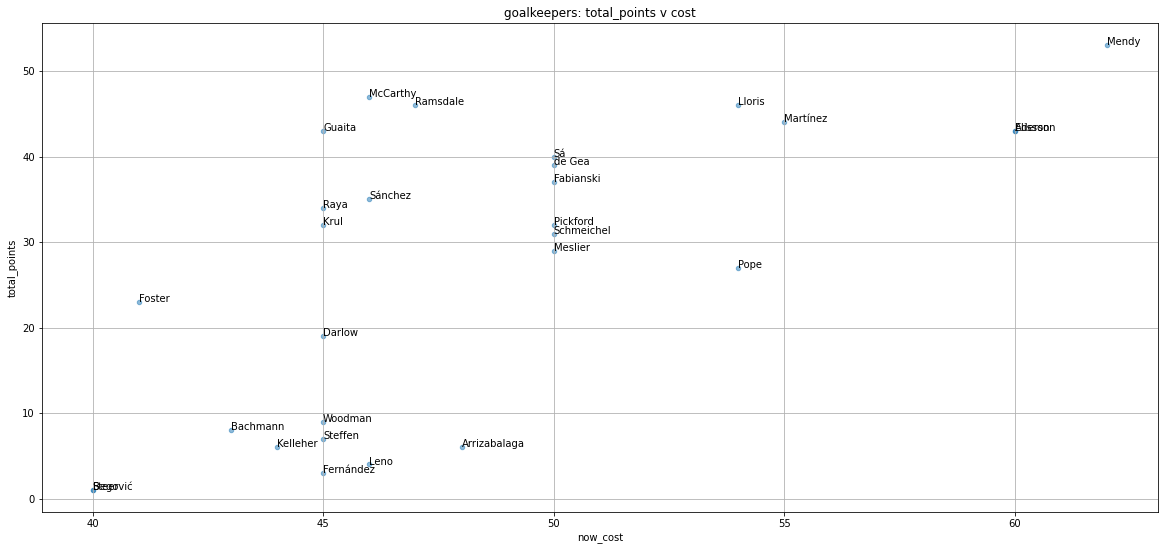

In [32]:
ax = gk_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="goalkeepers: total_points v cost")
for i, txt in enumerate(gk_df.web_name):
    ax.annotate(txt, (gk_df.now_cost.iat[i],gk_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [33]:
def_df.sort_values('total_points',ascending=False)

web_name            team  selection_percentage  now_cost  \
361           Cancelo        Man City                  27.8        64   
338  Alexander-Arnold       Liverpool                  29.4        77   
186             James         Chelsea                  20.8        59   
172           Rüdiger         Chelsea                  18.0        59   
330          van Dijk       Liverpool                  18.0        67   
367              Dias        Man City                  26.0        61   
570         Cresswell        West Ham                  15.1        55   
487        Livramento     Southampton                  22.7        45   
230             Keane         Everton                   2.8        50   
21            Gabriel         Arsenal                   2.2        51   
179          Chilwell         Chelsea                  19.7        60   
189          Chalobah         Chelsea                   4.7        49   
69            Jansson       Brentford                  10.4        47   
84            Pinnock       Brentford                   6.6        47   
164       Azpilicueta         Chelsea                   6.1        59   
104             Duffy        Brighton                  24.0        44   
107              Dunk        Brighton                   4.9        50   
511          Reguilón           Spurs                   9.6        50   
568           Ogbonna        West Ham                   0.9        50   
167            Alonso         Chelsea                   9.2        56   
166      Thiago Silva         Chelsea                   3.9        55   
51               Cash     Aston Villa                   3.8        51   
26              White         Arsenal                  11.9        44   
147            Lowton         Burnley                   1.7        44   
211          Mitchell  Crystal Palace                   1.1        45   
76              Henry       Brentford                   1.4        45   
354            Walker        Man City                   6.6        55   
502              Dier           Spurs                   4.7        45   
177       Christensen         Chelsea                   3.5        50   
364           Laporte        Man City                   3.3        55   
477          Bednarek     Southampton                   0.9        44   
35           Tomiyasu         Arsenal                   3.5        46   
215             Guéhi  Crystal Palace                   0.4        45   
595             Coady          Wolves                   6.1        45   
485            Salisu     Southampton                   0.3        45   
214              Ward  Crystal Palace                   0.3        45   
199           Kouyaté  Crystal Palace                   0.7        45   
216          Andersen  Crystal Palace                   0.4        45   
45              Mings     Aston Villa                   6.2        49   
605            Kilman          Wolves                   0.4        45   
597             Saïss          Wolves                   1.0        50   
598            Marçal          Wolves                   3.0        44   
325             Matip       Liverpool                   2.8        50   
132         Cucurella        Brighton                   1.2        50   
407            Varane         Man Utd                   2.2        55   
386           Maguire         Man Utd                   5.3        54   
399       Wan-Bissaka         Man Utd                   4.5        52   
335         Robertson       Liverpool                   2.1        70   
603            Semedo          Wolves                   2.6        49   
564             Zouma        West Ham                   1.6        54   
150            Taylor         Burnley                   0.3        44   
388              Shaw         Man Utd                  19.8        52   
346          Tsimikas       Liverpool                  13.1        39   
15            Tierney         Arsenal                   4.6        48  

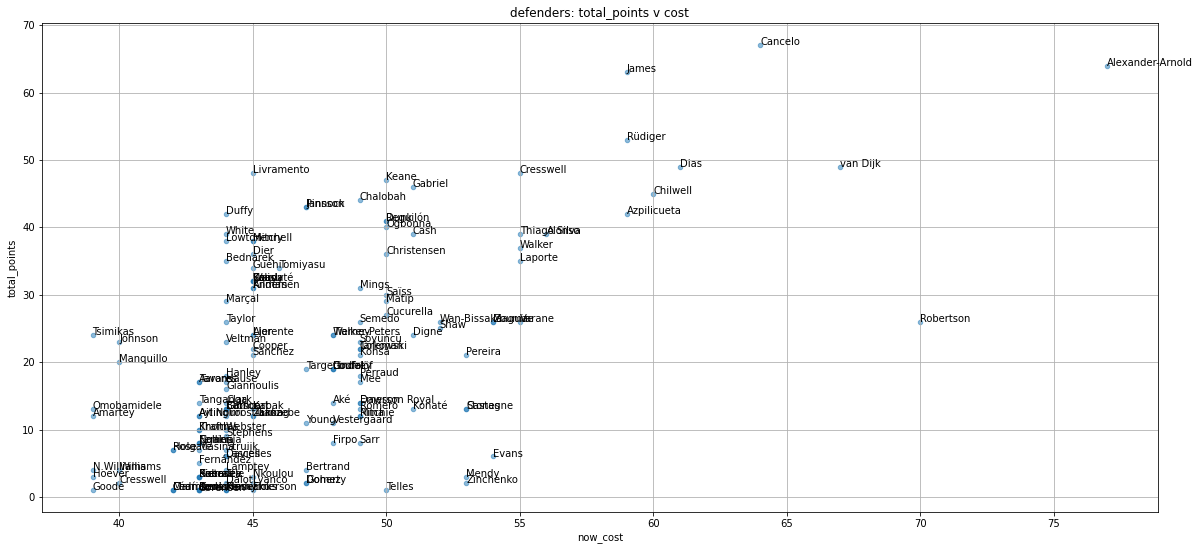

In [34]:
ax = def_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="defenders: total_points v cost")
for i, txt in enumerate(def_df.web_name):
    ax.annotate(txt, (def_df.now_cost.iat[i],def_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [35]:
topmid_df = mid_df.loc[mid_df.ict_score > 25]
topmid_df = topmid_df.loc[mid_df.total_points > 15]
topmid_df.sort_values('total_points',ascending=False)

web_name            team  selection_percentage  now_cost  assists  \
334          Salah       Liverpool                  71.5       130        8   
194      Gallagher  Crystal Palace                  14.1        58        4   
331           Mané       Liverpool                   3.9       119        1   
500            Son           Spurs                  19.4       103        2   
578       Benrahma        West Ham                  30.2        64        3   
19      Smith Rowe         Arsenal                  20.4        58        2   
579          Bowen        West Ham                   1.9        63        6   
244       Townsend         Everton                  11.5        56        2   
390      Fernandes         Man Utd                  18.7       117        3   
271      Tielemans       Leicester                   8.4        65        2   
582        Fornals        West Ham                   2.1        60        2   
112       Trossard        Brighton                   2.4        64        1   
303       Raphinha           Leeds                  19.3        66        0   
366       Bernardo        Man City                   6.2        71        2   
203           Zaha  Crystal Palace                   7.3        70        1   
547           Sarr         Watford                  11.0        61        0   
245           Gray         Everton                  15.4        57        2   
341           Jota       Liverpool                  12.6        75        1   
170        Kovacic         Chelsea                   4.9        52        5   
400      Greenwood         Man Utd                   9.3        74        1   
234       Doucouré         Everton                   2.0        54        4   
182          Mount         Chelsea                  15.6        75        3   
580           Rice        West Ham                   5.5        50        3   
20            Saka         Arsenal                   9.9        63        3   
370          Foden        Man City                  14.8        83        2   
323      Henderson       Liverpool                   1.9        50        2   
506       Højbjerg           Spurs                   2.8        49        1   
185        Havertz         Chelsea                   7.5        81        1   
385          Pogba         Man Utd                   8.6        75        7   
581         Soucek        West Ham                   4.9        58        1   
74           Canós       Brentford                   1.9        55        1   
353       Grealish        Man City                  13.1        77        2   
162         Cornet         Burnley                   1.2        60        0   
42          McGinn     Aston Villa                   1.0        58        1   
168       Jorginho         Chelsea                   4.4        58        1   
197       McArthur  Crystal Palace                   3.5        45        2   
355       Gündogan        Man City                   2.5        72        0   
232          Allan         Everton                   6.0        46        2   
89          Mbeumo       Brentford                   4.6        56        0   
70        Nørgaard       Brentford                   1.0        50        1   
340          Keita       Liverpool                   0.3        50        1   
356      De Bruyne        Man City                   3.1       119        0   
472        Redmond     Southampton                   0.3        59        2   
475    Ward-Prowse     Southampton                   2.1        63        0   
144       Westwood         Burnley                   0.3        53        3   
50         Buendía     Aston Villa                   1.1        62        1   
371        Rodrigo        Man City                   0.7        55        0   
295         Dallas           Leeds                   4.9        51        1   
276         Barnes       Leicester                   2.5        65        1   
488    Elyounoussi     Southampton                   0.2    

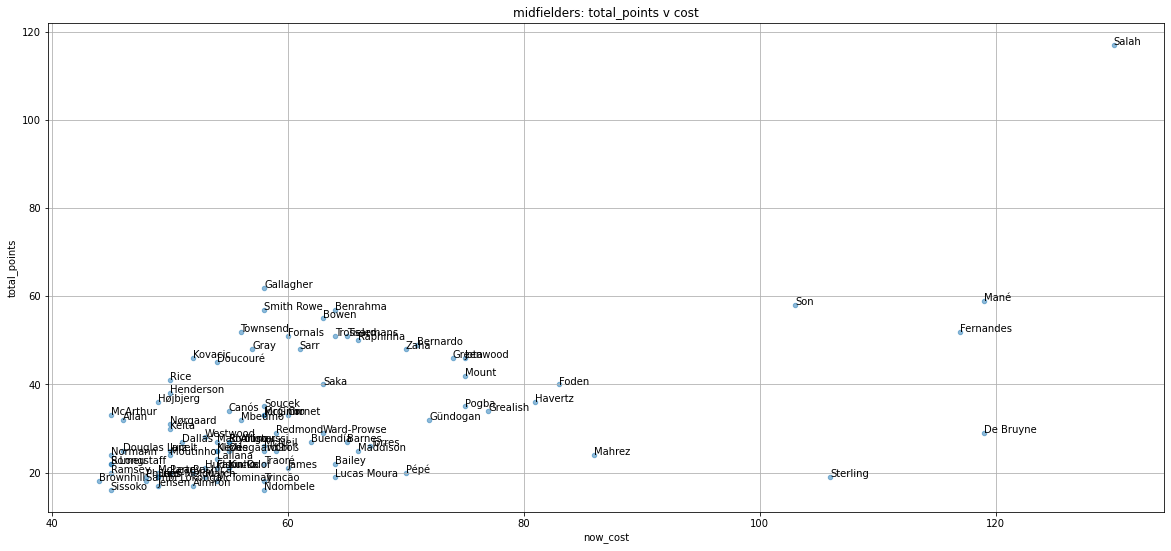

In [36]:
ax = topmid_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="midfielders: total_points v cost")
for i, txt in enumerate(topmid_df.web_name):
    ax.annotate(txt, (topmid_df.now_cost.iat[i],topmid_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [37]:
fwd_df

web_name            team  selection_percentage  now_cost  assists  \
3       Aubameyang         Arsenal                   5.8       101        1   
5        Lacazette         Arsenal                   1.1        83        0   
29         Balogun         Arsenal                   0.3        48        0   
47         Watkins     Aston Villa                   2.2        73        1   
54          Wesley     Aston Villa                   0.1        54        0   
56           Davis     Aston Villa                   2.4        44        0   
61            Ings     Aston Villa                  10.9        77        2   
66          Archer     Aston Villa                   1.4        45        0   
71           Toney       Brentford                  22.5        67        2   
81           Forss       Brentford                   0.1        53        0   
111         Maupay        Brighton                   3.4        65        0   
119       Connolly        Brighton                   0.1        53        0   
123        Welbeck        Brighton                   0.1        60        0   
141      Rodriguez         Burnley                   0.5        53        1   
142         Barnes         Burnley                   1.0        53        0   
146           Wood         Burnley                   1.2        67        0   
148          Vydra         Burnley                   0.3        52        1   
178         Werner         Chelsea                   1.3        86        1   
190         Lukaku         Chelsea                   9.4       115        0   
198        Benteke  Crystal Palace                   1.3        63        1   
202           Ayew  Crystal Palace                   0.5        58        1   
208         Mateta  Crystal Palace                   0.1        53        0   
223        Edouard  Crystal Palace                   3.0        65        0   
238  Calvert-Lewin         Everton                   2.7        80        0   
241    Richarlison         Everton                   4.4        74        1   
251           Kean         Everton                   0.0        60        0   
254         Rondón         Everton                   0.2        60        0   
256         Dobbin         Everton                   0.4        45        0   
266          Vardy       Leicester                  30.1       108        1   
274      Iheanacho       Leicester                   3.0        70        2   
283           Daka       Leicester                   1.2        71        1   
294        Rodrigo           Leeds                   2.0        63        0   
296        Bamford           Leeds                   3.6        77        2   
317       Gelhardt           Leeds                   1.0        45        1   
329        Firmino       Liverpool                   3.6        88        1   
336          Origi       Liverpool                   1.0        49        0   
368          Jesus        Man City                   9.9        87        5   
382         Cavani         Man Utd                   1.9        84        0   
391        Martial         Man Utd                   0.6        76        0   
408        Ronaldo         Man Utd                  31.7       124        1   
415         Wilson       Newcastle                   2.1        73        0   
419          Gayle       Newcastle                   0.1        53        0   
426  Saint-Maximin       Newcastle                  15.2        68        3   
429      Joelinton       Newcastle                   0.3        58        1   
441          Pukki         Norwich                   4.0        58        0   
455           Idah         Norwich                   0.4        49        0   
464        Sargent         Norwich                   0.1        54        0   
479          Adams     Southampton                   1.0        68        2   
489          Broja     Southampton                   1.5        50        0   
490           Long     Southampton                   0.2    

In [38]:
np.mean(fwd_df.total_points)

21.06451612903226

In [39]:
topfwd_df = fwd_df.loc[fwd_df.ict_score > 50]
topfwd_df = topfwd_df.loc[fwd_df.total_points > np.mean(fwd_df.total_points)]
topfwd_df.sort_values('total_points',ascending=False)

web_name            team  selection_percentage  now_cost  assists  \
572        Antonio        West Ham                  47.6        82        4   
266          Vardy       Leicester                  30.1       108        1   
368          Jesus        Man City                   9.9        87        5   
426  Saint-Maximin       Newcastle                  15.2        68        3   
596        Jiménez          Wolves                   9.8        77        3   
554         Dennis         Watford                   8.1        52        3   
557           King         Watford                   3.7        56        3   
408        Ronaldo         Man Utd                  31.7       124        1   
71           Toney       Brentford                  22.5        67        2   
3       Aubameyang         Arsenal                   5.8       101        1   
491    A.Armstrong     Southampton                   3.0        59        2   
329        Firmino       Liverpool                   3.6        88        1   
146           Wood         Burnley                   1.2        67        0   
190         Lukaku         Chelsea                   9.4       115        0   
198        Benteke  Crystal Palace                   1.3        63        1   
47         Watkins     Aston Villa                   2.2        73        1   
498           Kane           Spurs                   7.4       122        1   
294        Rodrigo           Leeds                   2.0        63        0   

     goals_scored  ict_score  current_form  minutes  bonus points_per_game  \
572             6      117.8           3.0      898     12             6.1   
266             7       79.9           3.0      935     12             5.5   
368             2       85.1           2.2      765      8             5.0   
426             2       73.2           2.0      980      7             4.1   
596             2       78.9           4.2      901      7             3.9   
554             3       67.1           4.0      738      5             4.0   
557             3       62.8           4.8      636      5             4.3   
408             4       70.9           4.0      643      6             4.8   
71              2       70.7           1.8      990      4             3.5   
3               4       75.9           4.0      788      7             3.8   
491             2       53.9           3.8      784      3             3.6   
329             4       51.6           6.0      367      5             4.4   
146             2       51.3           3.0      910      3             2.9   
190             3       57.9           0.5      616      5             4.4   
198             2       50.2           4.2      676      3             2.7   
47              2       59.3           3.5      731      1             3.0   
498             1       51.4           4.5      828      3             2.7   
294             2       63.7           4.5      762      4             2.6   

     total_points  value  
572            61    7.4  
266            60    5.6  
368            50    5.7  
426            45    6.6  
596            43    5.6  
554            40    7.7  
557            39    7.0  
408            38    3.1  
71             38    5.7  
3              38    3.8  
491            36    6.1  
329            35    4.0  
146            32    4.8  
190            31    2.7  
198            30    4.8  
47             27    3.7  
498            27    2.2  
294            26    4.1

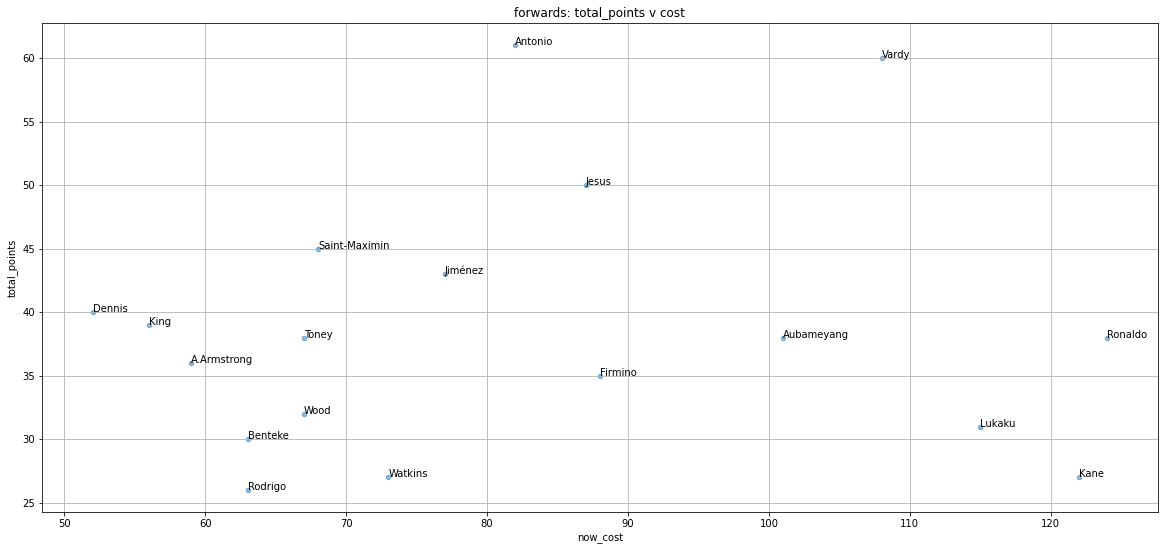

In [40]:
ax = topfwd_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="forwards: total_points v cost")
for i, txt in enumerate(topfwd_df.web_name):
    ax.annotate(txt, (topfwd_df.now_cost.iat[i],topfwd_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [41]:
top5_gk_df = gk_df.nlargest(5, 'value')
top5_def_df = def_df.nlargest(5, 'value')
top5_mid_df = mid_df.nlargest(5, 'value')
top5_fwd_df = fwd_df.nlargest(5, 'value')

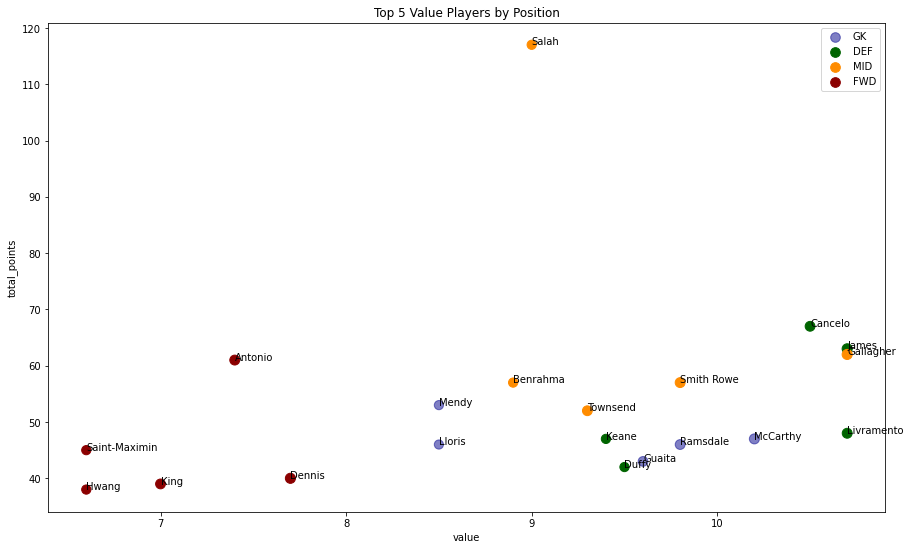

In [42]:
ax = top5_gk_df.plot.scatter(x='value', y='total_points', color='DarkBlue', label='GK', s=top5_gk_df['value']*10, alpha=.5, figsize=(15,9), title="Top 5 Value Players by Position")
for i, txt in enumerate(top5_gk_df.web_name):
    ax.annotate(txt, (top5_gk_df.value.iat[i],top5_gk_df.total_points.iat[i]))
top5_def_df.plot.scatter(x='value', y='total_points', color='DarkGreen', label='DEF', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_def_df.web_name):
    ax.annotate(txt, (top5_def_df.value.iat[i],top5_def_df.total_points.iat[i]))
top5_mid_df.plot.scatter(x='value', y='total_points', color='DarkOrange', label='MID', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_mid_df.web_name):
    ax.annotate(txt, (top5_mid_df.value.iat[i],top5_mid_df.total_points.iat[i]))
top5_fwd_df.plot.scatter(x='value', y='total_points', color='DarkRed', label='FWD', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_fwd_df.web_name):
    ax.annotate(txt, (top5_fwd_df.value.iat[i],top5_fwd_df.total_points.iat[i]))

Reference:
### David Allen
url: https://towardsdatascience.com/fantasy-premier-league-value-analysis-python-tutorial-using-the-fpl-api-8031edfe9910#99db
### Charlie Byatt
url: https://towardsdatascience.com/python-for-fpl-data-analytics-dadb414ccefd